In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


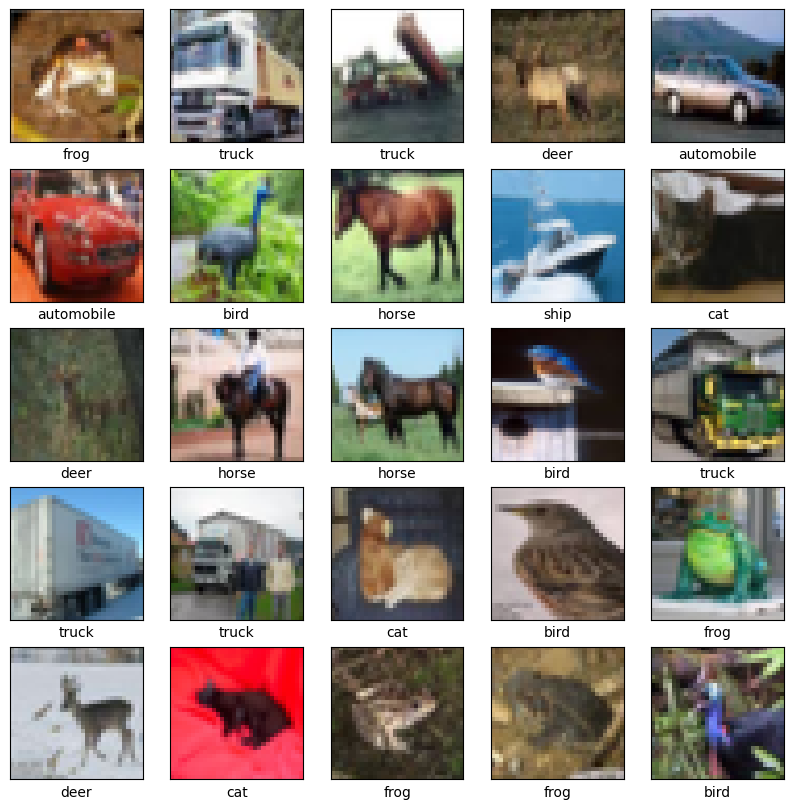

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.Conv2D(128, (9, 9), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(128, (5, 5),padding='same', activation='relu'))
model.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model.add(layers.Conv2D(64, (9, 9), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        2112      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       663680    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       409728    
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=128, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 24s 30ms/step - loss: 1.6986 - accuracy: 0.3667 - val_loss: 1.4160 - val_accuracy: 0.4931
Epoch 2/30
391/391 [==============================] - 10s 27ms/step - loss: 1.2397 - accuracy: 0.5498 - val_loss: 1.0857 - val_accuracy: 0.6067
Epoch 3/30
391/391 [==============================] - 11s 27ms/step - loss: 1.0146 - accuracy: 0.6370 - val_loss: 0.9827 - val_accuracy: 0.6565
Epoch 4/30
391/391 [==============================] - 11s 28ms/step - loss: 0.8728 - accuracy: 0.6907 - val_loss: 0.8788 - val_accuracy: 0.6866
Epoch 5/30
391/391 [==============================] - 10s 27ms/step - loss: 0.7761 - accuracy: 0.7256 - val_loss: 0.8308 - val_accuracy: 0.7098
Epoch 6/30
391/391 [==============================] - 11s 29ms/step - loss: 0.6849 - accuracy: 0.7586 - val_loss: 0.7700 - val_accuracy: 0.7306
Epoch 7/30
391/391 [==============================] - 10s 27ms/step - loss: 0.6140 - accuracy: 0.7838 - val_loss: 0.7559 - val_accuracy: 0.7387
Epo

313/313 - 1s - loss: 1.5490 - accuracy: 0.7575 - 1s/epoch - 5ms/step


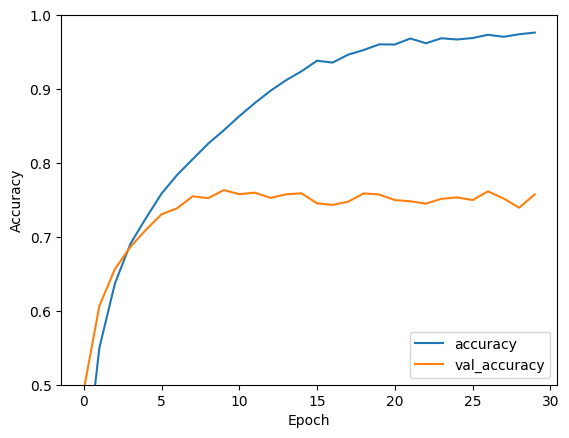

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print('Accuracy on test set is: ',test_acc)
val_acc=history.history['val_accuracy']
print('The best accuracy achieved in validation is: ',max(val_acc))

Accuracy on test set is:  0.7574999928474426
The best accuracy achieved in validation is:  0.7633000016212463


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.Conv2D(128, (9, 9), activation='relu',padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Conv2D(128, (5, 5),padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.Conv2D(64, (9, 9), activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(layers.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        2112      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels,batch_size=128, epochs=30,
                    validation_data=(test_images, test_labels))

Epoch 1/30
391/391 [==============================] - 24s 44ms/step - loss: 1.7605 - accuracy: 0.4001 - val_loss: 2.8811 - val_accuracy: 0.2006
Epoch 2/30
391/391 [==============================] - 17s 44ms/step - loss: 1.1577 - accuracy: 0.5972 - val_loss: 1.6787 - val_accuracy: 0.4789
Epoch 3/30
391/391 [==============================] - 17s 44ms/step - loss: 0.9430 - accuracy: 0.6771 - val_loss: 0.9979 - val_accuracy: 0.6630
Epoch 4/30
391/391 [==============================] - 17s 43ms/step - loss: 0.8203 - accuracy: 0.7236 - val_loss: 0.8288 - val_accuracy: 0.7267
Epoch 5/30
391/391 [==============================] - 17s 43ms/step - loss: 0.7204 - accuracy: 0.7599 - val_loss: 0.9294 - val_accuracy: 0.7003
Epoch 6/30
391/391 [==============================] - 17s 44ms/step - loss: 0.6509 - accuracy: 0.7819 - val_loss: 0.8486 - val_accuracy: 0.7321
Epoch 7/30
391/391 [==============================] - 17s 43ms/step - loss: 0.5968 - accuracy: 0.8015 - val_loss: 0.7466 - val_accuracy:

313/313 - 1s - loss: 0.6647 - accuracy: 0.8359 - 1s/epoch - 5ms/step


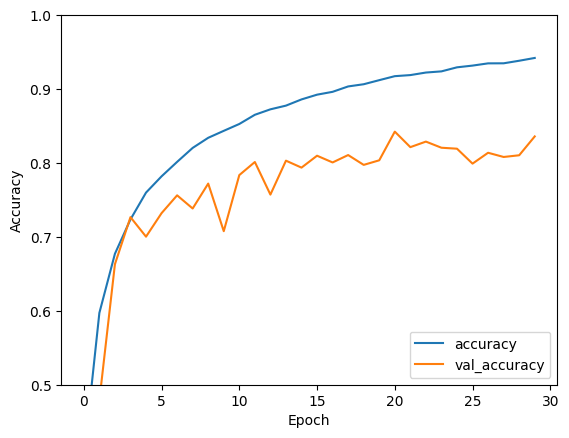

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print('Accuracy on test set is: ',test_acc)
val_acc=history1.history['val_accuracy']
print('The best accuracy achieved in validation is: ',max(val_acc))

Accuracy on test set is:  0.8359000086784363
The best accuracy achieved in validation is:  0.8424000144004822
